In [2]:
import numpy as np

import math
import matplotlib.pyplot as plt

In [3]:
# условие
# a = 2
# x1 = math.cos(x2) + 1
# x2 = math.log(x1 + 1) + a

def f1(x1, x2):
    return x1 - math.cos(x2) - 1

def f2(x1, x2):
    return x2 - math.log(x1 + 1) - 2

def df1_x1(x1, x2):
    return 1

def df1_x2(x1, x2):
    return math.sin(x2)

def df2_x1(x1, x2):
    return -1 / ((x1 + 1) )#* math.log(10))

def df2_x2(x1, x2):
    return 1

def phi1(x2):
    return math.cos(x2) + 1

def phi2(x1):
    return math.log(x1 + 1) + 2

def dphi1(x2):
    return -math.sin(x2)

def dphi2(x1):
    return 1 / ((x1 + 1) )#* math.log(10))

In [4]:
def det(mat):
    return mat[0][0]*mat[1][1]-mat[0][1]*mat[1][0]

def norm(x1, x2):
    return max(abs(x1[0]-x2[0]), abs(x1[1]-x2[1]))


def create_mat(x1, x2):
    a1 = [
        [f1(x1, x2), df1_x2(x1, x2)],
        [f2(x1, x2), df2_x2(x1, x2)]
        ]
    a2 = [
        [df1_x1(x1, x2), f1(x1, x2)],
        [df2_x1(x1, x2), f2(x1, x2)]
    ]

    j = [
        [df1_x1(x1, x2), df1_x2(x1, x2)],
        [df2_x1(x1, x2), df2_x2(x1, x2)]
    ]

    #det_j = recursive(j)
    #return x1 - recursive(a1)[0] / det_j[0], x2 - recursive(a2)[0] / det_j[0]
    
    x1_new = x1 - det(a1)/det(j)
    x2_new = x2 - det(a2)/det(j)
    
    return x1_new, x2_new


In [5]:
def newton(x1, x2, eps):
    while True:
        x1_new, x2_new = create_mat(x1, x2)
        
        print('x1 =', x1, 'x1_new = ', x1_new)
        print('x2 =', x2, 'x2_new = ', x2_new)
        print('-------------------------------------------------------')
        ep = round(norm((x1_new, x2_new ), (x1,x2)),4)
        if (ep <= eps):
            print("eps =", ep)
            break
        x1 = x1_new
        x2 = x2_new
    return x1_new, x2_new

In [6]:
newton(2, 4, 0.01)

x1 = 2 x1_new =  -1.1238659348813749
x2 = 4 x2_new =  2.057323643707652
-------------------------------------------------------


ValueError: math domain error

In [190]:
def get_G(x1, x2):
    return max(abs(dphi1(x2)), abs(dphi2(x1)))

def simple_it(x1, x2, eps):
    q = get_G(x1, x2)
    print (q)
    while True:
        x1_new, x2_new = phi1(x2), phi2(x1)
        
        print('x1 =', x1, 'x1_new = ', x1_new)
        print('x2 =', x2, 'x2_new = ', x2_new)
        print('-------------------------------------------------------')
        
        ep = abs(q/(1-q)*norm((x1_new, x2_new ), (x1,x2)))
        #ep = abs(round(norm((x1_new, x2_new ), (x1,x2)),4))
        ep = round(ep,4)
        if (ep <= eps):
            print("eps =", ep)
            break
        x1 = x1_new
        x2 = x2_new

In [191]:
simple_it(2, 4, 0.01)

0.7568024953079282
x1 = 2 x1_new =  0.34635637913638806
x2 = 4 x2_new =  3.4771212547196626
-------------------------------------------------------
x1 = 0.34635637913638806 x1_new =  0.0557636100570873
x2 = 3.4771212547196626 x2_new =  3.1291600324038567
-------------------------------------------------------
x1 = 0.0557636100570873 x1_new =  7.728403928553007e-05
x2 = 3.1291600324038567 x2_new =  3.0235666887089203
-------------------------------------------------------
x1 = 7.728403928553007e-05 x1_new =  0.006956982593228189
x2 = 3.0235666887089203 x2_new =  3.0000335627348855
-------------------------------------------------------
x1 = 0.006956982593228189 x1_new =  0.010002767583729977
x2 = 3.0000335627348855 x2_new =  3.003010917801448
-------------------------------------------------------
eps = 0.0095


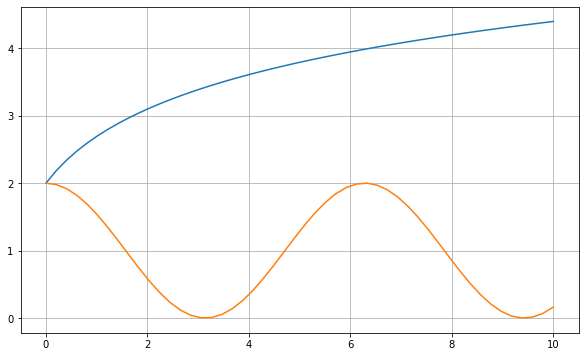

In [181]:
plt.figure(2, figsize=(10, 6))

x = np.linspace(0, 10, 50) # от нуля, т.к.по условию корень положительный

y1 = [phi1(i) for i in x]
y2 = [phi2(i) for i in x]
y3 = [dphi1(i) for i in x]
y4 = [dphi2(i) for i in x]


plt.plot(x, y2, x, y1)
#axis.plot(x, y3, x, y4)
plt.grid()
#plt.plot(x, y3, x, y4)
#plt.grid()

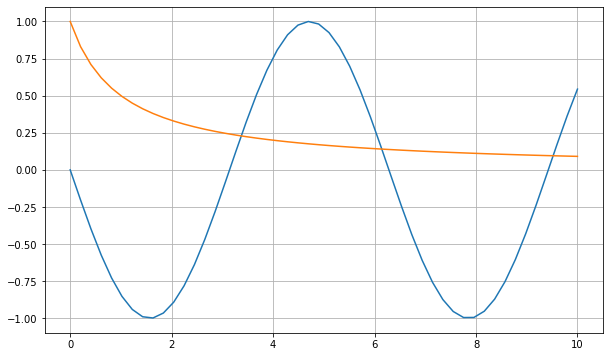

In [182]:
plt.figure(2, figsize=(10, 6))
plt.plot(x, y3, x, y4)
plt.grid()

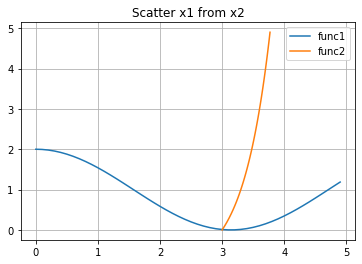

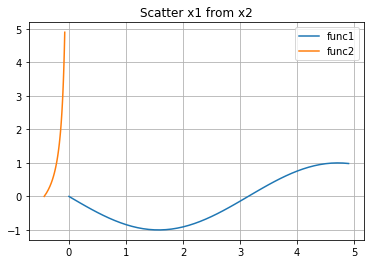

Iteration:
q: 0.7568024953079282
| x1 ==  0.3464 | x2 ==  3.4771 | eps ==  5.1459 |
| x1 ==  0.0558 | x2 ==  3.1292 | eps ==  1.0828 |
| x1 ==  0.0001 | x2 ==  3.0236 | eps ==  0.3286 |
| x1 ==  0.0070 | x2 ==  3.0000 | eps ==  0.0732 |
| x1 ==  0.0100 | x2 ==  3.0030 | eps ==  0.0095 |
| x1 ==  0.0096 | x2 ==  3.0043 | eps ==  0.0041 |
| x1 ==  0.0094 | x2 ==  3.0041 | eps ==  0.0006 |
Newton method:
| x1 == -0.3015 | x2 ==  3.1439 | eps ==  2.3015 |
| x1 == -0.0003 | x2 ==  3.0315 | eps ==  0.3012 |
| x1 ==  0.0091 | x2 ==  3.0039 | eps ==  0.0275 |
| x1 ==  0.0094 | x2 ==  3.0041 | eps ==  0.0004 |


(0.009439898563763054, 3.0040804936593997)

In [183]:
import math
import numpy as np
import matplotlib.pyplot as plt

"""
x1 - cos(x2) = 1
x2 - lg(x1 - 1) = a
a = 3
"""


# First func
def f1(x1, x2):
    return x1 - math.cos(x2) - 1


def x1(x2):
    return math.cos(x2) + 1


def df1_x1(x1, x2):
    return 1


def df1_x2(x1, x2):
    return math.sin(x2)


# Second func
def f2(x1, x2):
    return x2 - math.log10(x1 + 1) - 3


def x2(x1):
    return math.log10(x1 + 1) + 3


def df2_x1(x1, x2):
    return -1 / ((x1 + 1) * math.log(10))


def df2_x2(x1, x2):
    return 1


function = {
    "f1": f1,
    "f2": f2,

    "df1_dx1": df1_x1,
    "df1_dx2": df1_x2,
    "df2_dx1": df2_x1,
    "df2_dx2": df2_x2
}


def norm(x, x_last):
    return max(abs(x[0] - x_last[0]), abs(x[1] - x_last[1]))


# determinant of a 2x2 matrix
def det2(m):
    return m[0][0] * m[1][1] - m[1][0] * m[0][1]


# recursive part
def recursive(m, some=None, prod=1):
    if some is None:
        some = []

    if len(m) == 1:
        some.append(m[0][0])
    elif len(m) == 2:
        some.append(det2(m) * prod)
    else:
        for index, elem in enumerate(m[0]):
            transpose = [list(a) for a in zip(*m[1:])]
            del transpose[index]
            minor = [list(a) for a in zip(*transpose)]
            some = recursive(minor, some, prod * m[0][index] * (-1) ** (index + 2))

    return some


def compute(x1, x2, func):
    a1 = [
        [func["f1"](x1, x2), func["df1_dx2"](x1, x2)],
        [func["f2"](x1, x2), func["df2_dx2"](x1, x2)]
        ]
    a2 = [
        [func["df1_dx1"](x1, x2), func["f1"](x1, x2)],
        [func["df2_dx1"](x1, x2), func["f2"](x1, x2)]
    ]

    jacobi = [
        [func["df1_dx1"](x1, x2), func["df1_dx2"](x1, x2)],
        [func["df2_dx1"](x1, x2), func["df2_dx2"](x1, x2)]
    ]

    det_j = recursive(jacobi)

    return x1 - recursive(a1)[0] / det_j[0], x2 - recursive(a2)[0] / det_j[0]


def printer(data):
    for title, value in data.items():
        print(f"| {title} == {value:7.4f} ", end='')
    print('|')


def newton(x1, x2, eps=0.01):
    x1_last, x2_last = x1, x2
    k = 0
    while True:
        k += 1
        x1_cur, x2_cur = compute(x1_last, x2_last, function)

        cur_eps = norm((x1_cur, x2_cur), (x1_last, x2_last))
        printer({"x1": x1_cur, "x2": x2_cur, "eps": cur_eps})

        if cur_eps <= eps:
            break
        x1_last = x1_cur
        x2_last = x2_cur

    return x1_cur, x2_cur


def phi1(x2):
    return math.cos(x2) + 1


def phi2(x1):
    return math.log10(x1 + 1) + 3


def dphi1_dx1(x1,x2):
    return 0


def dphi1_dx2(x2):
    return -math.sin(x2)


def dphi2_dx1(x1):
    return -1 / ((x1 + 1) * math.log(10))


def dphi2_dx2(x1, x2):
    return 0


phi = {
    "phi1": phi1,
    "phi2": phi2,

    "dphi1_dx1": dphi1_dx1,
    "dphi1_dx2": dphi1_dx2,
    "dphi2_dx1": dphi2_dx1,
    "dphi2_dx2": dphi2_dx2
}


def getQ(x1, x2, phi):
    return max(
        abs(phi["dphi1_dx1"](x1, x2)) + abs(phi["dphi1_dx2"](x2)),
        abs(phi["dphi2_dx1"](x1)) + abs(phi["dphi2_dx2"](x1, x2)))


def simpleIteration(x1, x2, eps = 0.01):
    x1_last, x2_last = x1, x2
    k = 0

    q = getQ(x1, x2, phi)
    print("q:", q)
    if q >= 1:
        print("Leave field of G")
        printer({"q": q})
    while True:
        k += 1
        x1_cur, x2_cur = phi1(x2_last), phi2(x1_last)

        cur_eps = abs((q / (1 - q) * norm((x1_cur, x2_cur), (x1_last, x2_last))))
        printer({"x1": x1_cur, "x2": x2_cur, "eps": cur_eps})

        if cur_eps <= eps:
            break

        x1_last = x1_cur
        x2_last = x2_cur
    return x1_cur, x2_cur


def plot_show(f1, f2, x, file = None, step = 0.1):
    X = np.arange(x[0], x[-1], step)
    Y1 = [f1(val) for val in X]
    Y2 = [f2(val) for val in X]

    fig, axis = plt.subplots()
    axis.set_title(f'Scatter x1 from x2')
    axis.plot(X, Y1, label='func1')
    axis.plot(Y2, X, label='func2')
    axis.legend(loc='upper right')
    axis.grid()

    if file:
        fig.savefig(file)
        print(f'Saved in {file}')
        plt.close(fig)

    plt.show()


plot_show(x1, x2, [0, 5])
plot_show(dphi1_dx2, dphi2_dx1, [0, 5])
print("Iteration:")
simpleIteration(2, 4, 0.001)
print("Newton method:")
newton(2, 4, 0.001)